In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **EDA**

In [78]:
train_data= pd.read_csv('/kaggle/input/butterfly-image-classification/Training_set.csv')
test_data=pd.read_csv('/kaggle/input/butterfly-image-classification/Testing_set.csv')

print(train_data.head())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


In [39]:
print("\n \t Info about train set")
print(train_data.info())
print("\n \t Info about test set")
print(test_data.info())


 	 Info about train set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB
None

 	 Info about test set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2786 non-null   object
dtypes: object(1)
memory usage: 21.9+ KB
None


In [34]:
print(train_data['label'].unique())

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [35]:
number_per_class=train_data.groupby('label').count()
print(number_per_class)

                           filename
label                              
ADONIS                           88
AFRICAN GIANT SWALLOWTAIL        75
AMERICAN SNOOT                   74
AN 88                            85
APPOLLO                          90
...                             ...
ULYSES                           84
VICEROY                          81
WOOD SATYR                       71
YELLOW SWALLOW TAIL              75
ZEBRA LONG WING                  76

[75 rows x 1 columns]


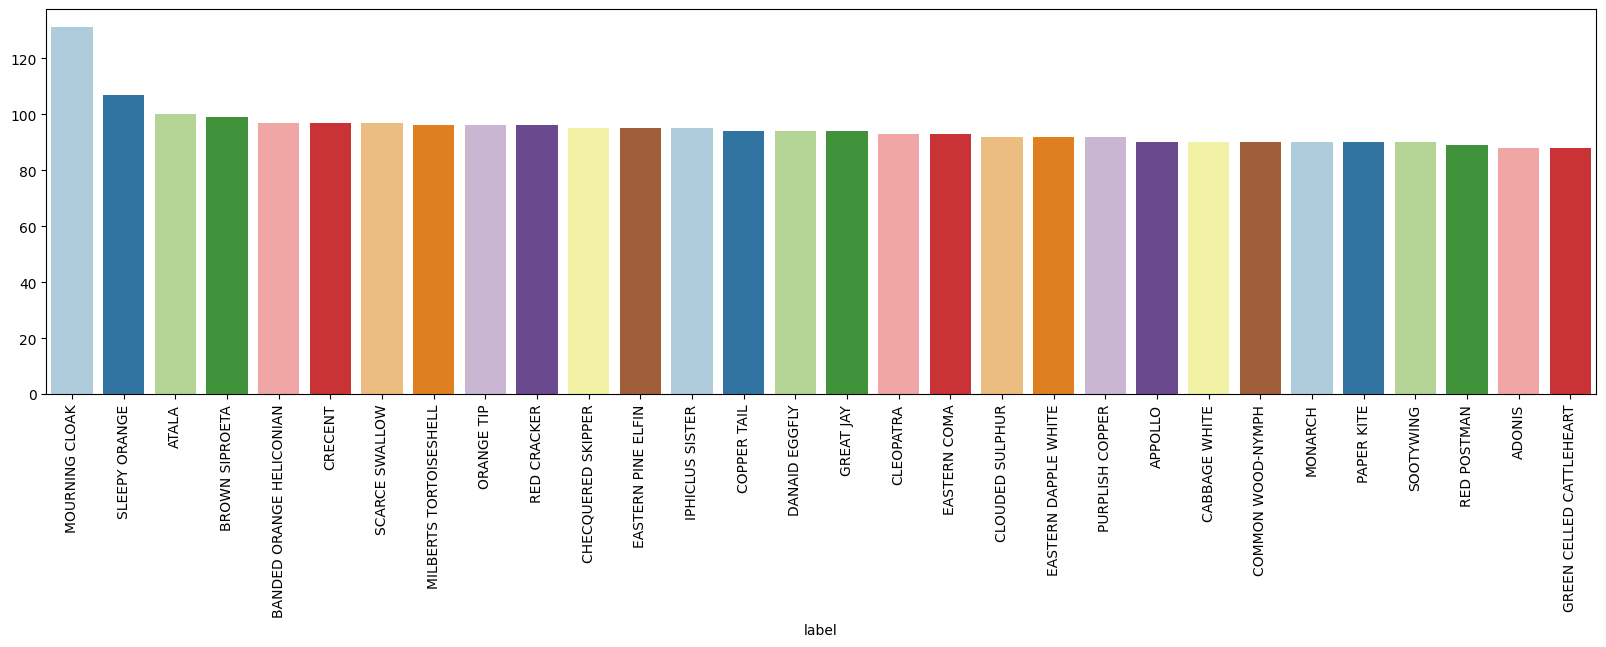

In [36]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 5))
top_10_classes = number_per_class['filename'].nlargest(30)
plot=sns.barplot(x=top_10_classes.index, y=top_10_classes.values, palette="Paired")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [10]:
print(test_data.head())

      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


# **Data preparation/ work with images**

In [11]:
train_df, val_df= train_test_split(train_data, test_size=0.05, shuffle=True,  stratify=train_data['label'])
print(val_df.shape)
print(val_df.head())

(325, 2)
            filename          label
1238  Image_1239.jpg         ULYSES
4510  Image_4511.jpg  QUESTION MARK
5054  Image_5055.jpg     PINE WHITE
4671  Image_4672.jpg   GREAT EGGFLY
2850  Image_2851.jpg    COPPER TAIL


In [12]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_dataframe(dataframe=train_df, 
                                                 directory = '/kaggle/input/butterfly-image-classification/train',
                                                 x_col='filename',
                                                 y_col='label',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode='categorical')

val_generator=datagen.flow_from_dataframe(dataframe=val_df, 
                                               directory ='/kaggle/input/butterfly-image-classification/train',
                                               x_col='filename',
                                               y_col='label',
                                               target_size=(224, 224),
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42,
                                               class_mode='categorical')


test_generator=datagen.flow_from_dataframe(dataframe=test_data, 
                                                 directory ='/kaggle/input/butterfly-image-classification/test',
                                                 x_col='filename',
                                                 y_col= None,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 shuffle=False,
                                                 class_mode=None)

Found 6174 validated image filenames belonging to 75 classes.
Found 325 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [87]:
class_names = list(train_generator.class_indices.keys())

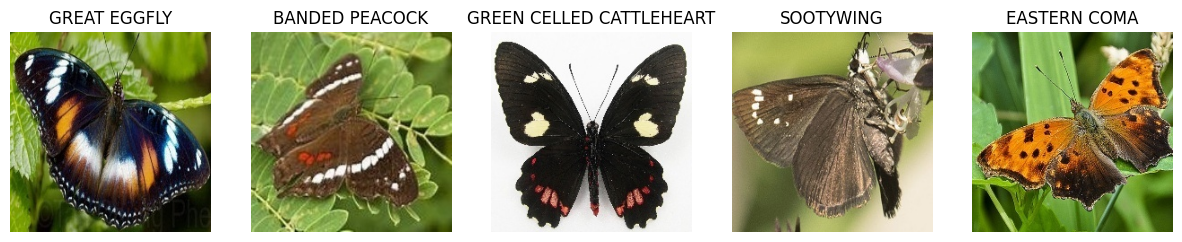

In [83]:
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = np.argmax(labels[i])
    plt.title(f"{class_names[label_index]}")
plt.show()

# **Building model**

In [40]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(75, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
from tensorflow.keras.losses import CategoricalCrossentropy
loss = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,765,323 (14.36 MB)

 Trainable params: 3,765,323 (14.36 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss',
                                      save_best_only=True, mode='min')
history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs=100,
                  callbacks = [monitor_val_acc, checkpoint_callback])

Epoch 1/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.0159 - loss: 4.3219 - val_accuracy: 0.0338 - val_loss: 4.2681
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.0321 - loss: 4.2147 - val_accuracy: 0.0646 - val_loss: 3.9818
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.0591 - loss: 3.9697 - val_accuracy: 0.1015 - val_loss: 3.7164
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.1108 - loss: 3.6961 - val_accuracy: 0.2277 - val_loss: 3.4103
Epoch 5/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.1841 - loss: 3.4034 - val_accuracy: 0.2585 - val_loss: 3.2402
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.2261 - loss: 3.2180 - val_accuracy: 0.3323 - val_loss: 3.0583
Epoch 7/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.2835 - loss: 3.0445 - val_accuracy: 0.3385 - val_loss: 2.9527
Epoch 8/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.3554 - loss: 2

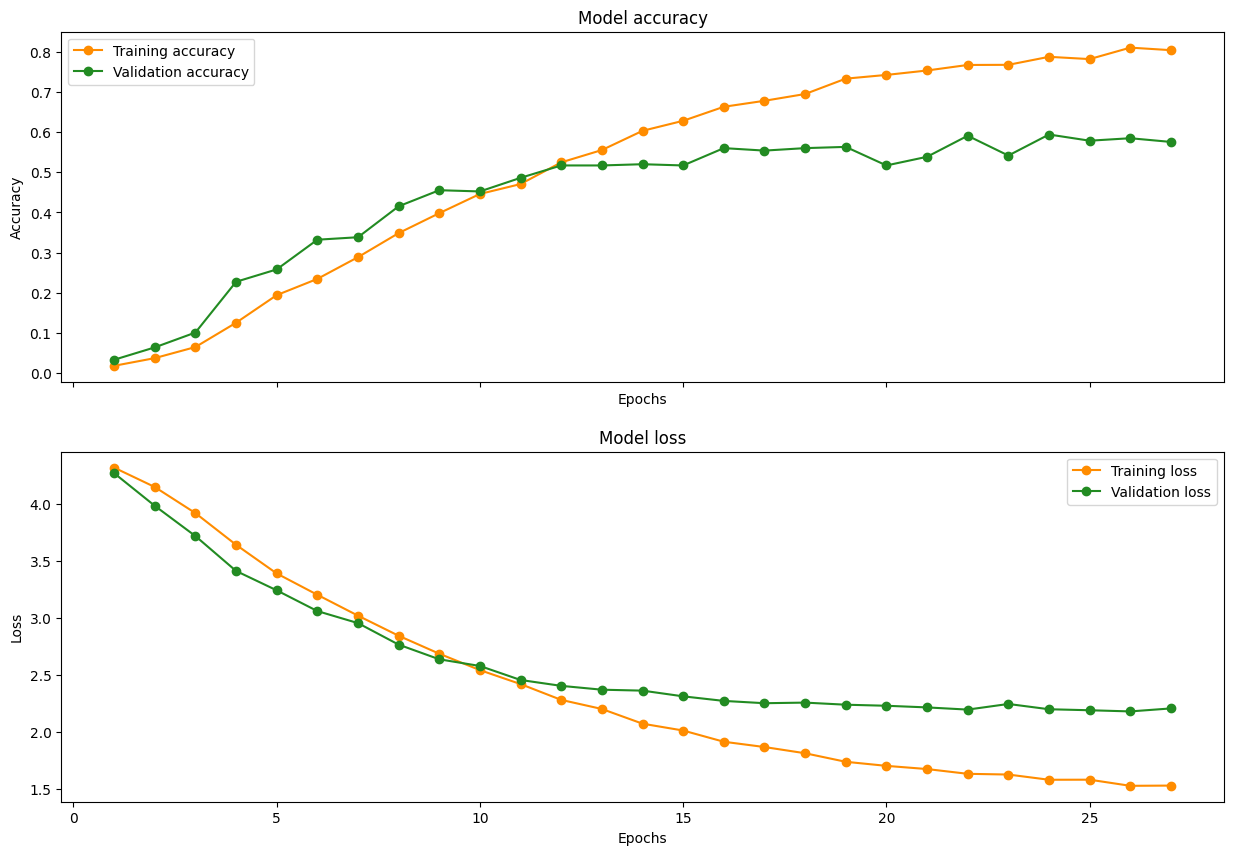

In [45]:
def plot_model_performance(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    fig,axs=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))
    axs[0].plot(epochs, history.history['accuracy'], label='Training accuracy', marker='o', color='darkorange')
    axs[0].plot(epochs, history.history['val_accuracy'], label='Validation accuracy', marker='o', color='forestgreen')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Model accuracy')
    axs[1].plot(epochs, history.history['loss'], label='Training loss', marker='o', color='darkorange')
    axs[1].plot(epochs, history.history['val_loss'], label='Validation loss', marker='o', color='forestgreen')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Model loss')
    for ax in axs:
        ax.set_xlabel('Epochs')
        ax.legend(loc='best')
    plt.show()

plot_model_performance(history)

In [44]:
loss, acc = model.evaluate(val_generator)
print(f'Test accuracy: {acc}')
print(f'Test loss: {loss}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5573 - loss: 2.2297
Test accuracy: 0.5938461422920227
Test loss: 2.1972169876098633


In [88]:
pred_probs = model.predict(test_generator)
pred_probabilities = np.max(pred_probs, axis=1)

pred_labels = np.argmax(pred_probs, axis=1)
pred_class_names = [class_names[label] for label in pred_labels]

test_data['predicted_class'] = pred_class_names
test_data['predicted_probability'] = pred_probabilities

test_data.head()

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 277ms/step


filename         predicted_class  predicted_probability
0  Image_1.jpg              PINE WHITE               0.189625
1  Image_2.jpg           CRIMSON PATCH               0.694820
2  Image_3.jpg             BLUE MORPHO               0.397268
3  Image_4.jpg         IPHICLUS SISTER               0.275666
4  Image_5.jpg  MILBERTS TORTOISESHELL               0.672484

In [123]:
import os
from PIL import Image
image_folder = '/kaggle/input/butterfly-image-classification/test/'

def display_results(max_probs_indices, min_probs_indices, col_name, col_prob):
    plt.figure(figsize=(15, 10))

    for i, idx in enumerate(max_probs_indices):
        img_path = os.path.join(image_folder, test_data.iloc[idx]['filename'])
        img = Image.open(img_path)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Pred: {test_data.iloc[idx][col_name]}\nProb: {test_data.iloc[idx][col_prob]:.2f}")

    for i, idx in enumerate(min_probs_indices):
        img_path = os.path.join(image_folder, test_data.iloc[idx]['filename'])
        img = Image.open(img_path)
        plt.subplot(2, 5, i + 6)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Pred: {test_data.iloc[idx][col_name]}\nProb: {test_data.iloc[idx][col_prob]:.2f}")
    
    plt.tight_layout()
    plt.show()

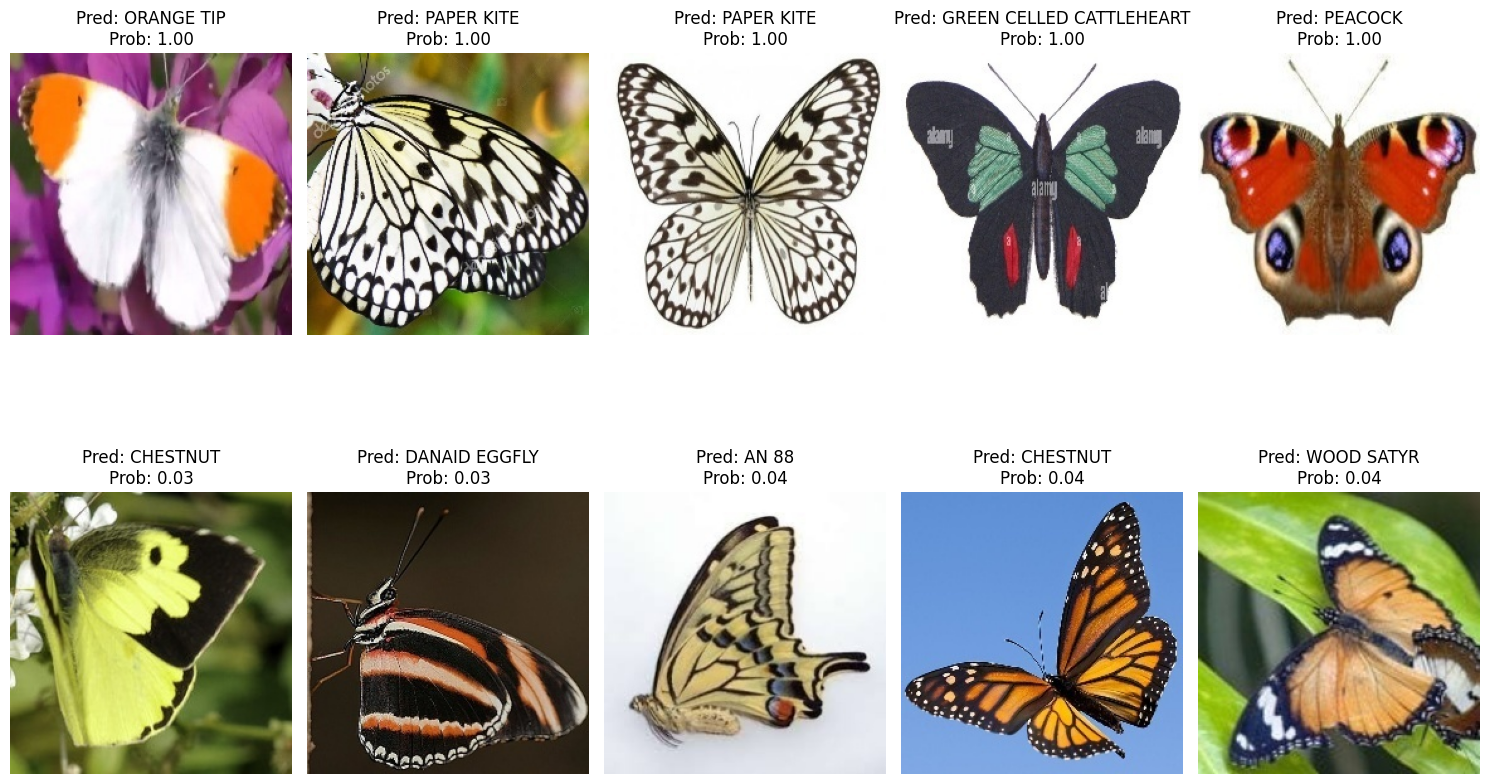

In [109]:
max_probs_indices = test_data['predicted_probability'].nlargest(5).index
min_probs_indices = test_data['predicted_probability'].nsmallest(5).index 

display_results(max_probs_indices, min_probs_indices, 'predicted_class', 'predicted_probability')

# Working with pre-trained model

In [58]:
from tensorflow.keras.applications import ResNet50

base_model=ResNet50(weights='imagenet', include_top=False,  input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
    
model_pretrained=Sequential([
    base_model,
    Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding='same'),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(75, activation='softmax')
])

In [59]:
model_pretrained.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history2=model_pretrained.fit(train_generator, validation_data=val_generator, 
                              epochs=30, callbacks=[early_stopping])

Epoch 1/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 43s 159ms/step - accuracy: 0.0177 - loss: 4.3588 - val_accuracy: 0.0492 - val_loss: 3.9113
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.0682 - loss: 3.8201 - val_accuracy: 0.1385 - val_loss: 3.3953
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.1406 - loss: 3.3993 - val_accuracy: 0.2031 - val_loss: 3.1533
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.1954 - loss: 3.1175 - val_accuracy: 0.2308 - val_loss: 2.9643
Epoch 5/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.2323 - loss: 2.8785 - val_accuracy: 0.2862 - val_loss: 2.8067
Epoch 6/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.2858 - loss: 2.7062 - val_accuracy: 0.3200 - val_loss: 2.7133
Epoch 7/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.3185 - loss: 2.5388 - val_accuracy: 0.3385 - val_loss: 2.6321
Epoch 8/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.3683 - loss: 2

In [61]:
model_pretrained.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 128)      │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,054,115 (137.54 MB)

 Trainable params: 4,155,467 (15.85 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 8,310,936 (31.70 MB)

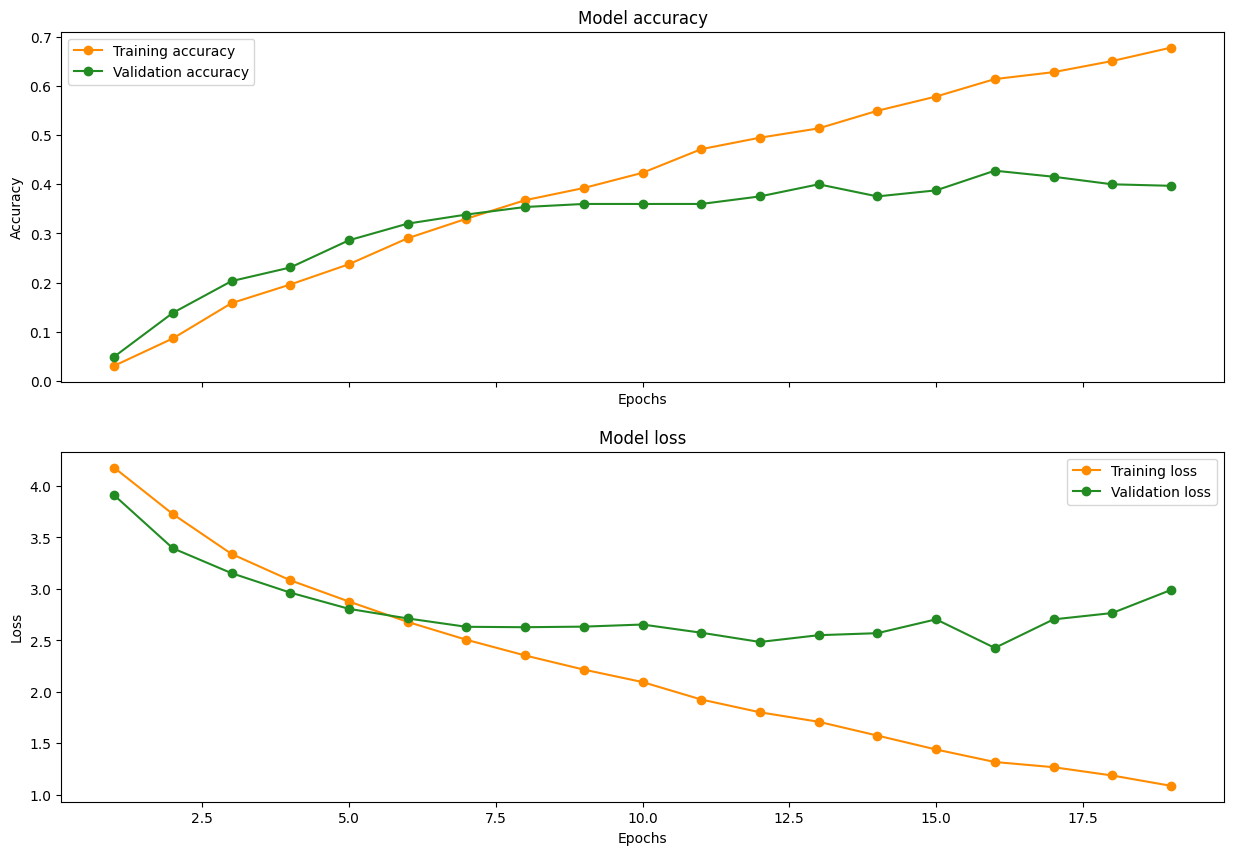

In [62]:
plot_model_performance(history2)

In [60]:
loss, acc = model_pretrained.evaluate(val_generator)
print(f'Test accuracy: {acc}')
print(f'Test loss: {loss}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4384 - loss: 2.4134
Test accuracy: 0.4276922941207886
Test loss: 2.426949977874756


In [102]:
pred_probs_ResNet = model_pretrained.predict(test_generator)
pred_probabilities_ResNet = np.max(pred_probs_ResNet, axis=1)

pred_labels_ResNet = np.argmax(pred_probs_ResNet, axis=1)
pred_class_names_ResNet = [class_names[label] for label in pred_labels_ResNet]

test_data['predicted_class_ResNet'] = pred_class_names_ResNet
test_data['predicted_probability_ResNet'] = pred_probabilities_ResNet

test_data.head()

88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step


filename         predicted_class  predicted_probability  \
0  Image_1.jpg              PINE WHITE               0.189625   
1  Image_2.jpg           CRIMSON PATCH               0.694820   
2  Image_3.jpg             BLUE MORPHO               0.397268   
3  Image_4.jpg         IPHICLUS SISTER               0.275666   
4  Image_5.jpg  MILBERTS TORTOISESHELL               0.672484   

  predicted_class_ResNet  predicted_probability_ResNet  \
0        ZEBRA LONG WING                      0.257155   
1             PINE WHITE                      0.198241   
2         BANDED PEACOCK                      0.491451   
3        IPHICLUS SISTER                      0.978095   
4          DANAID EGGFLY                      0.478077   

  predicted_class_ResNet_t  predicted_probability_ResNet_t  
0               PINE WHITE                        0.189625  
1            CRIMSON PATCH                        0.694820  
2              BLUE MORPHO                        0.397268  
3          IPHICLUS SISTER                        0.275666  
4   MILBERTS TORTOISESHELL                        0.672484

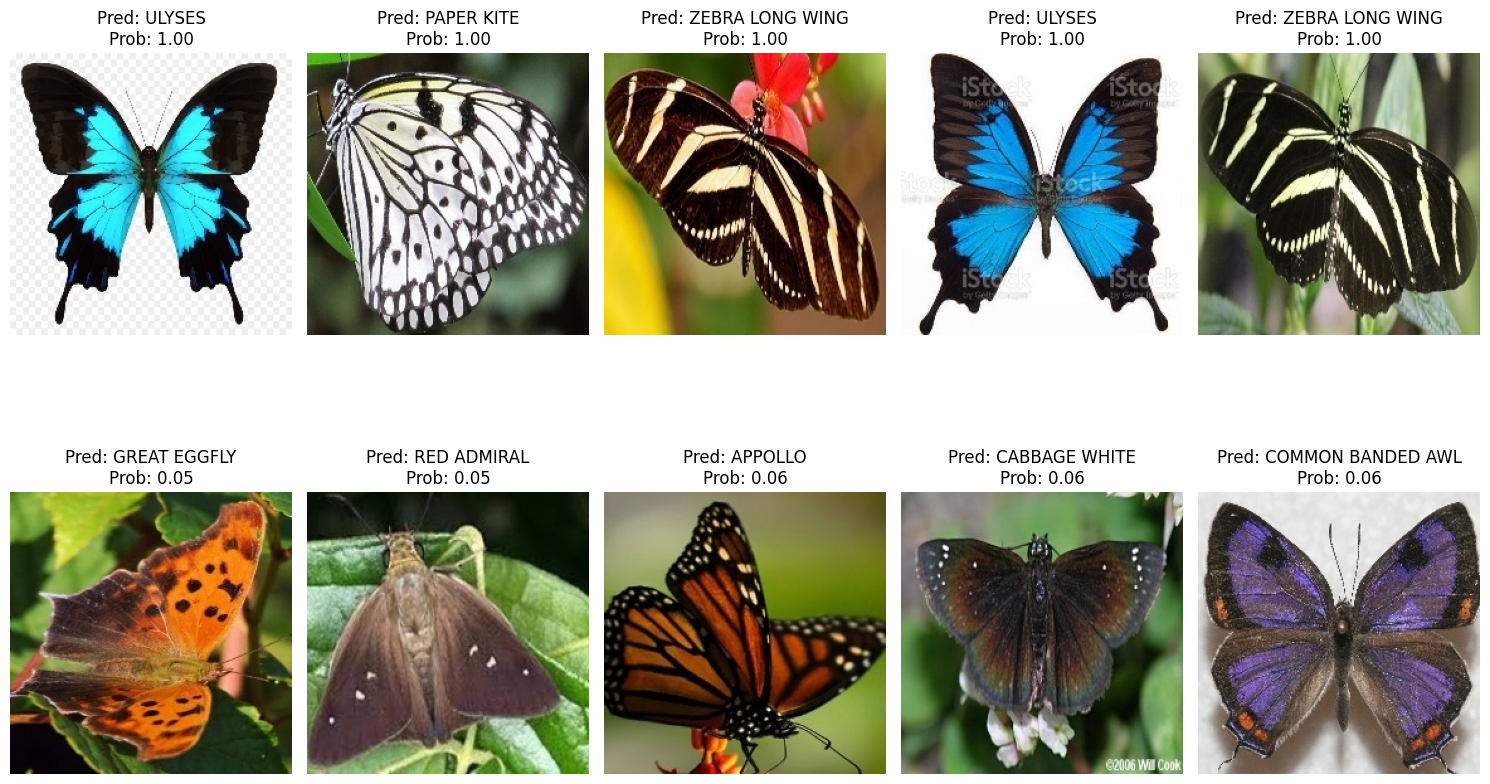

In [111]:
max_probs_indices_ResNet = test_data['predicted_probability_ResNet'].nlargest(5).index
min_probs_indices_ResNet = test_data['predicted_probability_ResNet'].nsmallest(5).index 

display_results(max_probs_indices_ResNet, min_probs_indices_ResNet, 'predicted_class_ResNet', 'predicted_probability_ResNet')

## Training a few layers of pre-trained model

In [66]:
for layer in base_model.layers[-20:]: 
    layer.trainable = True

model_fine_tuned = Sequential([
    base_model,
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(75, activation='softmax')
])

model_fine_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
early_stopping1 = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history3=model_fine_tuned.fit(train_generator, validation_data=val_generator, 
                              epochs=30, callbacks=[early_stopping1])

Epoch 1/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 57s 202ms/step - accuracy: 0.0220 - loss: 4.2718 - val_accuracy: 0.0523 - val_loss: 4.7612
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.0982 - loss: 3.6514 - val_accuracy: 0.0708 - val_loss: 4.5194
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.1798 - loss: 3.1472 - val_accuracy: 0.1538 - val_loss: 4.5907
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.2379 - loss: 2.8160 - val_accuracy: 0.1385 - val_loss: 4.2647
Epoch 5/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 46s 230ms/step - accuracy: 0.2950 - loss: 2.6017 - val_accuracy: 0.2277 - val_loss: 3.0888
Epoch 6/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 38s 186ms/step - accuracy: 0.3343 - loss: 2.4162 - val_accuracy: 0.3323 - val_loss: 2.5564
Epoch 7/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.3960 - loss: 2.1589 - val_accuracy: 0.3415 - val_loss: 2.4368
Epoch 8/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.4400 - loss: 2

In [71]:
model_fine_tuned.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 7, 7, 128)      │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,916,771 (205.68 MB)

 Trainable params: 13,086,795 (49.92 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

 Optimizer params: 26,173,592 (99.84 MB)

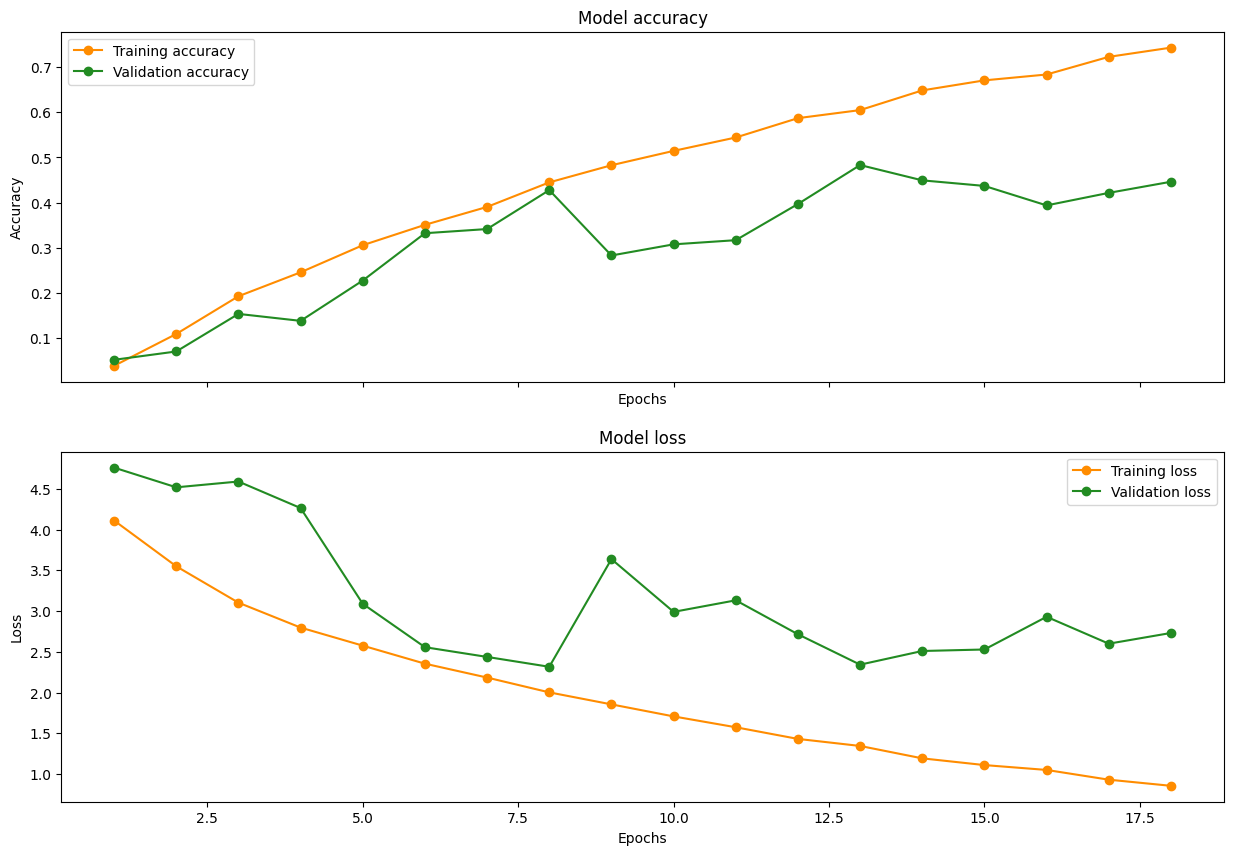

In [69]:
plot_model_performance(history3)

In [72]:
loss, acc = model_fine_tuned.evaluate(val_generator)
print(f'Test accuracy: {acc}')
print(f'Test loss: {loss}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.4814 - loss: 2.2595
Test accuracy: 0.48307693004608154
Test loss: 2.341942310333252


In [104]:
pred_probs_ResNet_t = model_fine_tuned.predict(test_generator)
pred_probabilities_ResNet_t = np.max(pred_probs_ResNet_t, axis=1)

pred_labels_ResNet_t = np.argmax(pred_probs_ResNet_t, axis=1)
pred_class_names_ResNet_t = [class_names[label] for label in pred_labels_ResNet_t]

test_data['predicted_class_ResNet_t'] = pred_class_names_ResNet_t
test_data['predicted_probability_ResNet_t'] = pred_probabilities_ResNet_t

test_data.head()

88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step


filename         predicted_class  predicted_probability  \
0  Image_1.jpg              PINE WHITE               0.189625   
1  Image_2.jpg           CRIMSON PATCH               0.694820   
2  Image_3.jpg             BLUE MORPHO               0.397268   
3  Image_4.jpg         IPHICLUS SISTER               0.275666   
4  Image_5.jpg  MILBERTS TORTOISESHELL               0.672484   

  predicted_class_ResNet  predicted_probability_ResNet  \
0        ZEBRA LONG WING                      0.257155   
1             PINE WHITE                      0.198241   
2         BANDED PEACOCK                      0.491451   
3        IPHICLUS SISTER                      0.978095   
4          DANAID EGGFLY                      0.478077   

  predicted_class_ResNet_t  predicted_probability_ResNet_t  
0             GREAT EGGFLY                        0.155640  
1           STRAITED QUEEN                        0.938775  
2              BLUE MORPHO                        0.121119  
3           BANDED PEACOCK                        0.268104  
4           BANDED PEACOCK                        0.662952

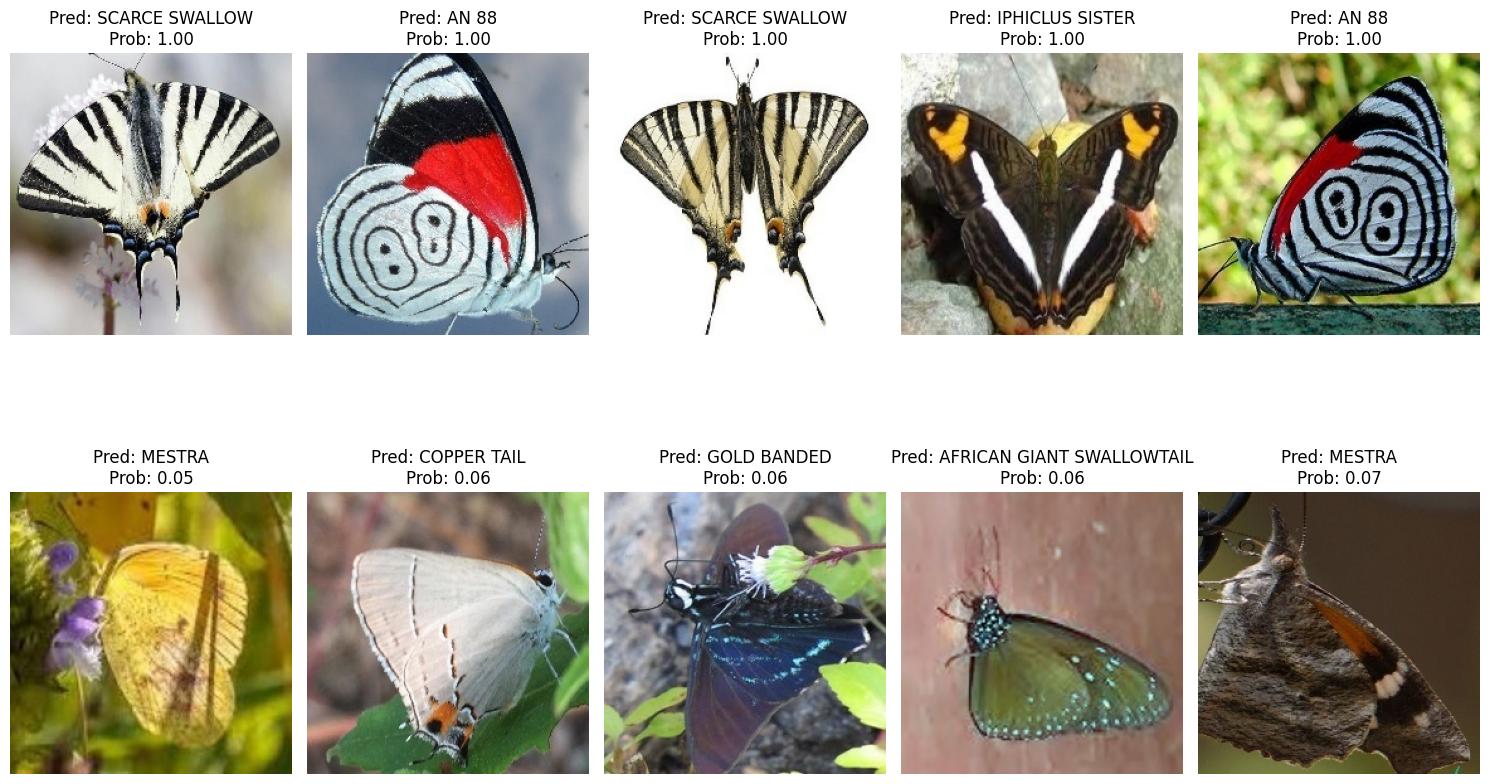

In [112]:
max_probs_indices_ResNet_t = test_data['predicted_probability_ResNet_t'].nlargest(5).index
min_probs_indices_ResNet_t = test_data['predicted_probability_ResNet_t'].nsmallest(5).index 

display_results(max_probs_indices_ResNet_t, min_probs_indices_ResNet_t, 'predicted_class_ResNet_t', 'predicted_probability_ResNet_t')

# Compare models

In [120]:
comparison = pd.DataFrame()
comparison['model_and_resnet'] = test_data['predicted_class'] == test_data['predicted_class_ResNet']
comparison['model_and_resnet_t'] = test_data['predicted_class'] == test_data['predicted_class_ResNet_t']
comparison['resnet_and_resnet_t'] = test_data['predicted_class_ResNet'] == test_data['predicted_class_ResNet_t']

accuracy1 = comparison['model_and_resnet'].mean()
accuracy2= comparison['model_and_resnet_t'].mean()
accuracy3= comparison['resnet_and_resnet_t'].mean()

print(f"Percentage of matches between model and ResNet: {accuracy1 * 100:.2f}%")
print(f"Percentage of matches between model and ResNet_t: {accuracy2 * 100:.2f}%")
print(f"Percentage of matches between ResNet and ResNet_t: {accuracy3 * 100:.2f}%")

Percentage of matches between model and ResNet: 8.61%
Percentage of matches between model and ResNet_t: 35.18%
Percentage of matches between ResNet and ResNet_t: 11.02%


In [134]:
same_predictions_indices = comparison[
    (comparison['model_and_resnet'] == True) & 
    (comparison['model_and_resnet_t'] == True) & 
    (comparison['resnet_and_resnet_t'] == True)
].index[:5] 

different_predictions_indices = comparison[
    (comparison['model_and_resnet'] == False) & 
    (comparison['model_and_resnet_t'] == False) & 
    (comparison['resnet_and_resnet_t'] == False)
].index[:5]

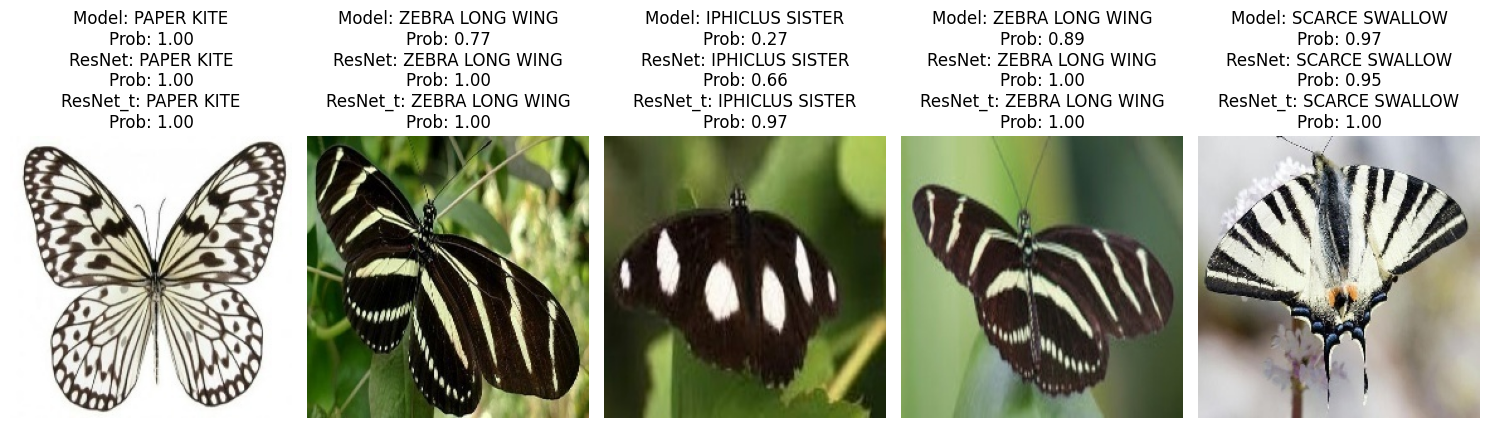

In [132]:
def display_images_with_predictions(indices):
    plt.figure(figsize=(15, 15))
    
    for i, idx in enumerate(indices):
        img_path = os.path.join(image_folder, test_data.iloc[idx]['filename'])
        img = Image.open(img_path)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        
        title = f"Model: {test_data.iloc[idx]['predicted_class']}\nProb: {test_data.iloc[idx]['predicted_probability']:.2f}\n"
        title += f"ResNet: {test_data.iloc[idx]['predicted_class_ResNet']}\nProb: {test_data.iloc[idx]['predicted_probability_ResNet']:.2f}\n"
        title += f"ResNet_t: {test_data.iloc[idx]['predicted_class_ResNet_t']}\nProb: {test_data.iloc[idx]['predicted_probability_ResNet_t']:.2f}"
        
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

display_images_with_predictions(same_predictions_indices)

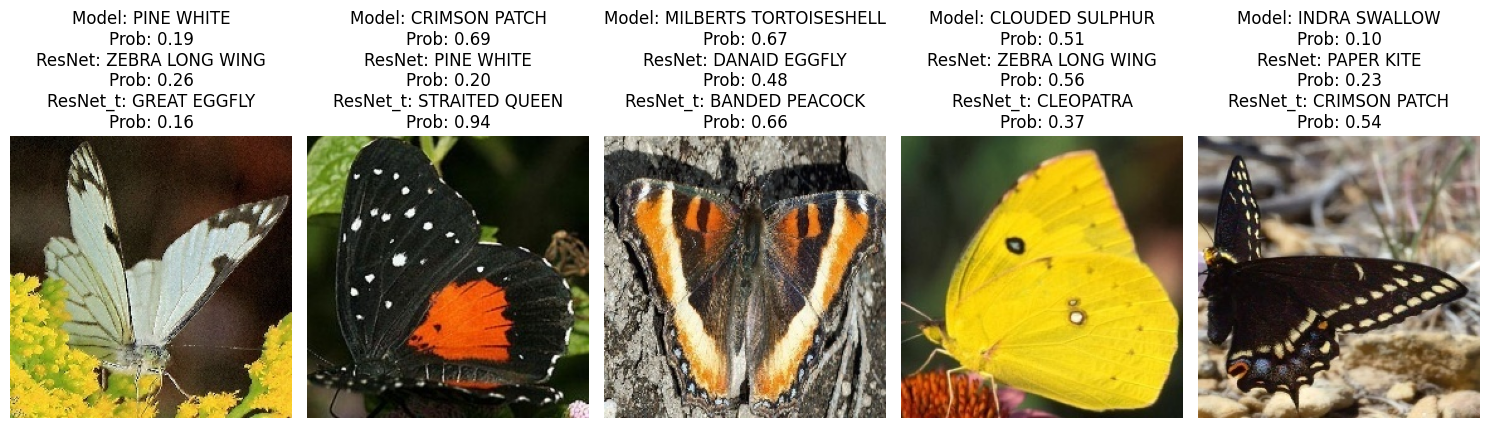

In [133]:
display_images_with_predictions(different_predictions_indices)